<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/CLUSTER%20KNN%20PRUEBA%20PASTILLAS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SUBIMOS PROVISIONALMENTE EL ARCHIVO A GOOGLE COLAB. 
# El archivo esta aquí C:\Users\FJMartin\OneDrive - JARMAUTO\Documentos\2018\POWER BI INFORMES\DATOS MAESTROS\MACHINE LEARNING
# y es Pastillas_clusterKNN.csv


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

In [3]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
# Suppress Warning

import warnings
warnings.filterwarnings("ignore")

In [6]:
dataset = pd.read_csv('/content/Pastillas_clusterKNN.csv', sep=";", decimal=",")


In [7]:
dataset.head()

,Tall,Matricula,F_matriculacion,Pastillas_FechaCierre,Antigüedad_dias,Antigüedad_años,Km
0,2,7255KVN,15-2-19,29-4-22,1169.0,3.25,91369.0
1,6,6558JSN,9-9-16,29-4-22,2058.0,5.72,137785.0
2,1,5048HWT,7-4-14,29-4-22,2944.0,8.18,66390.0
3,1,9290KXS,25-6-19,29-4-22,1039.0,2.89,34623.0
4,1,9114KZH,31-7-19,29-4-22,1003.0,2.79,77995.0


In [8]:
dataset["Tall"] = dataset["Tall"].astype(str)
dataset["Antigüedad_años"] = dataset["Antigüedad_años"].astype(float)


In [10]:
dataset.shape

(11307, 7)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11307 entries, 0 to 11306
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tall                   11307 non-null  object 
 1   Matricula              11307 non-null  object 
 2   F_matriculacion        11307 non-null  object 
 3   Pastillas_FechaCierre  11307 non-null  object 
 4   Antigüedad_dias        11307 non-null  float64
 5   Antigüedad_años        11307 non-null  float64
 6   Km                     11307 non-null  float64
dtypes: float64(3), object(4)
memory usage: 618.5+ KB


In [12]:
dataset.describe()

,Antigüedad_dias,Antigüedad_años,Km
count,11307.000000,11307.000000,11307.000000
mean,2265.127355,6.292288,107239.735031
std,1481.327104,4.114826,67972.709329
min,94.000000,0.260000,0.000000
25%,1146.000000,3.180000,59819.000000
50%,1799.000000,5.000000,89341.000000
75%,3083.000000,8.560000,135591.000000
max,21327.000000,59.240000,951156.000000


In [13]:
dataset.isnull().sum()

Tall                     0
Matricula                0
F_matriculacion          0
Pastillas_FechaCierre    0
Antigüedad_dias          0
Antigüedad_años          0
Km                       0
dtype: int64

#CHEQUEANDO OUTLIERS

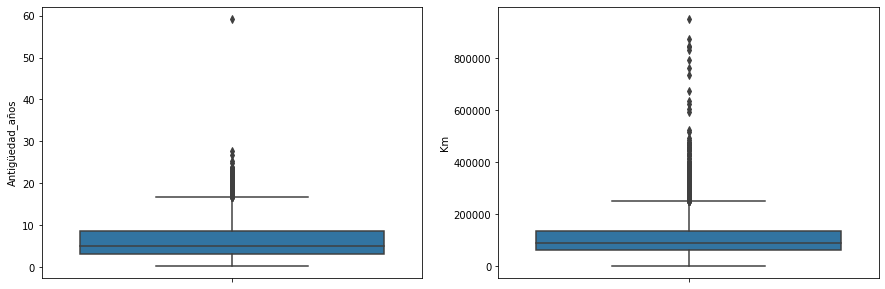

In [15]:
plt.figure(figsize=(15,5)) # aqui poenmos el tamaño de cada cuadradro. 

plt.subplot(1,2,1)
sns.boxplot(data=dataset, y="Antigüedad_años") # este va a ocupar el primer lugar de la segunda fila. 

plt.subplot(1,2,2)
sns.boxplot(data=dataset, y="Km") # este va a ocupar el segundo lugar de la primera fila. 

plt.show()
# lo que estamos viendo es un diagrama de bigotes donde apreciamos que no hay outliers.

# lo voy a hacer con outliers, mas adelante lo veré quitandolos. 

#EDA

## ANALISIS POR VARIABLE.

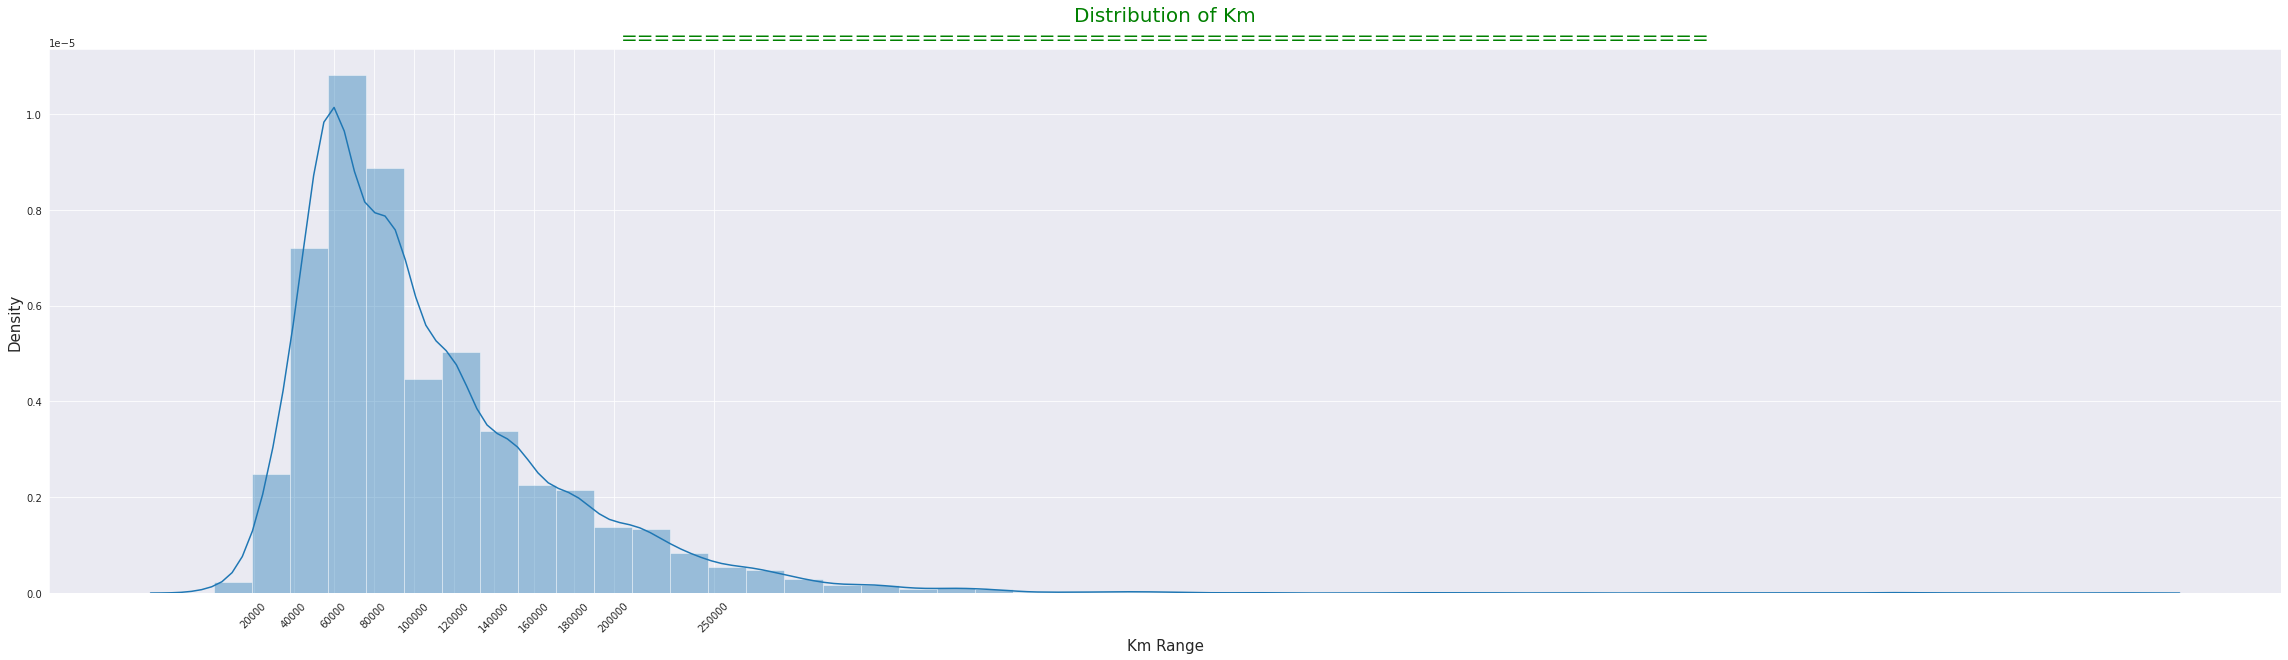

In [43]:
# Checking KM

plt.figure(figsize=(40,10)) # tamaño del gráfico
sns.set_style('darkgrid') # color del mismo

sns.distplot(dataset.Km) # valor que vamos a representar
plt.title("Distribution of Km\n=================================================================", fontsize=20, color="green") # titulo
plt.xticks([20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,250000]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.xticks(rotation=45) # y así las roto 45 grados. 
plt.xlabel("Km Range", fontsize=15, ) # distancia entre barras
plt.ylabel("Density", fontsize=15) # distancias en el eje x

plt.show()

# veo que se concentra la gran parte entre 60, 80 y 100.000 km luego está bastante disperso. 

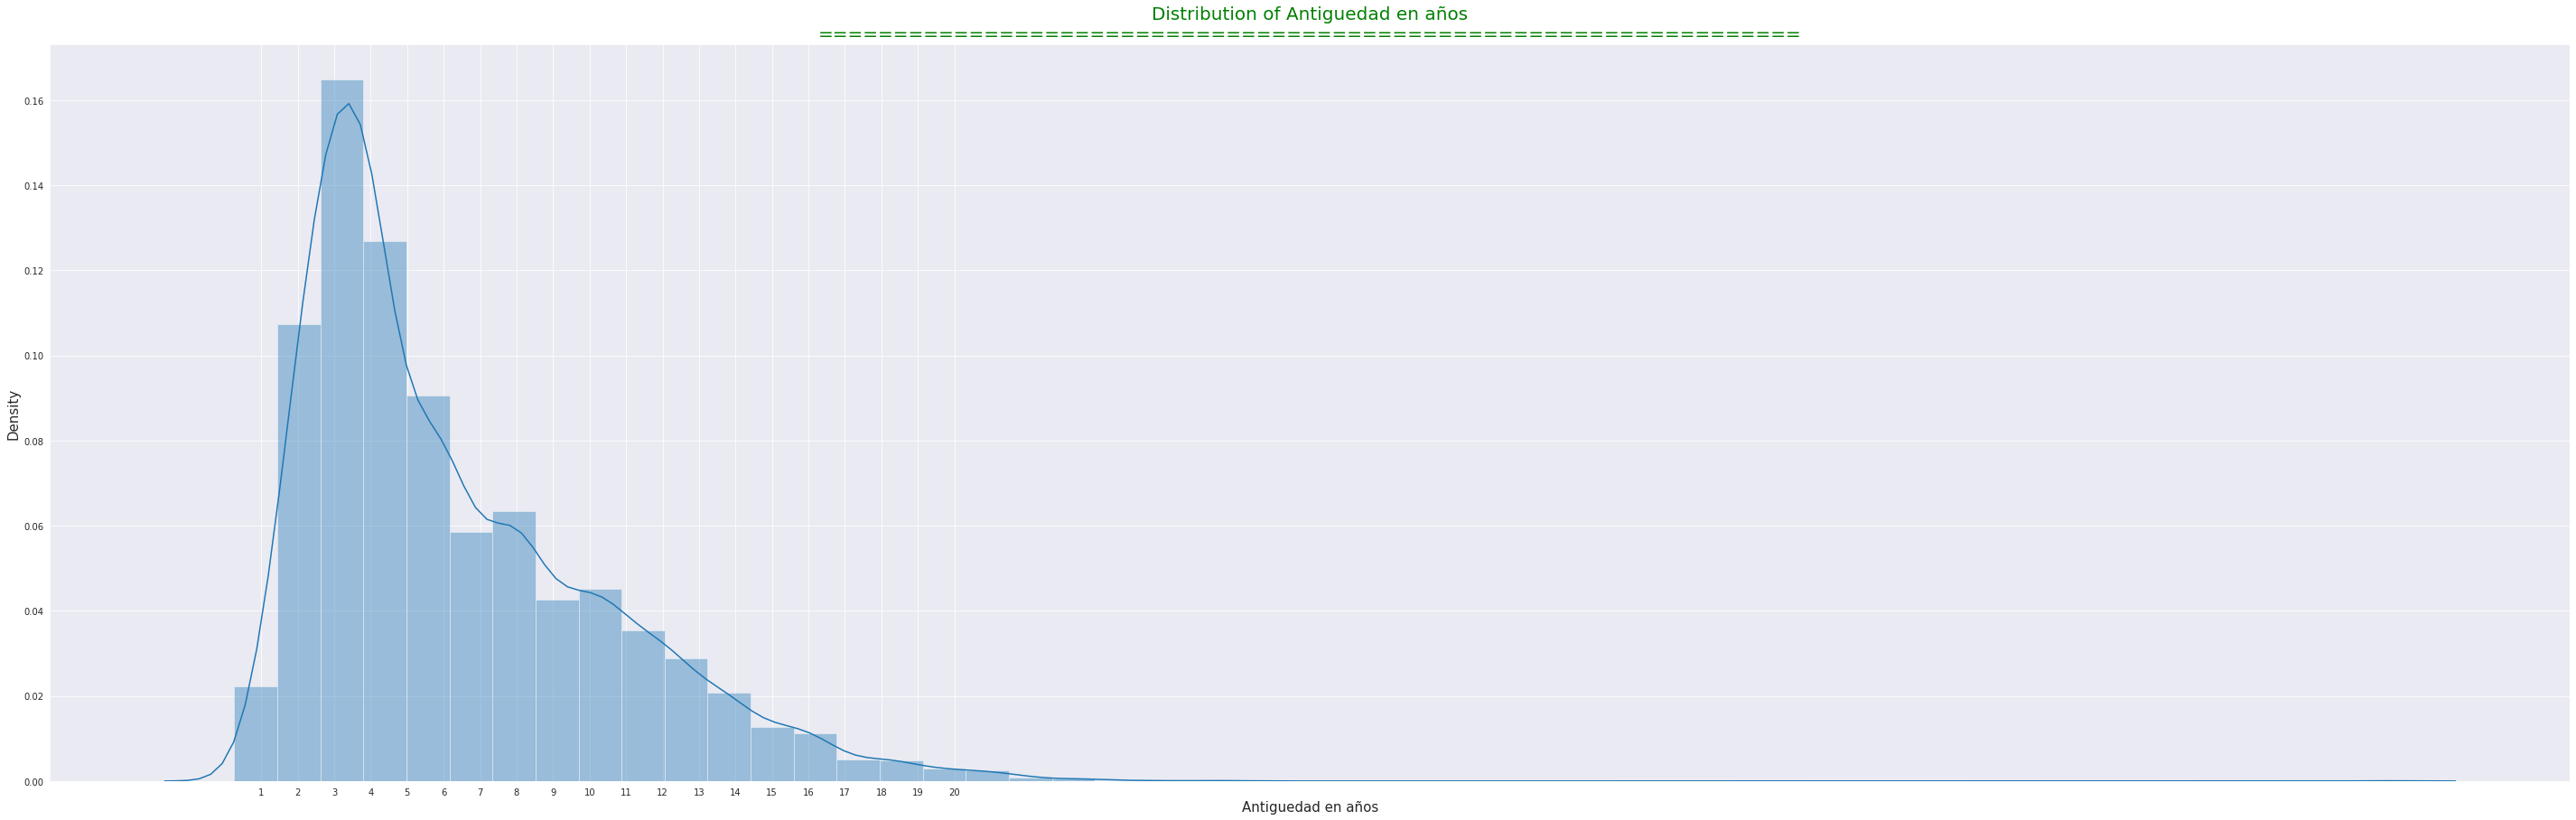

In [33]:
# Checking edad del vehículo

plt.figure(figsize=(50,15)) # tamaño del gráfico
sns.set_style('darkgrid') # color del mismo

sns.distplot(dataset.Antigüedad_años) # valor que vamos a representar
plt.title("Distribution of Antiguedad en años\n=================================================================", fontsize=20, color="green") # titulo
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.xlabel("Antiguedad en años", fontsize=15) # distancia entre barras
plt.ylabel("Density", fontsize=15) # distancias en el eje x

plt.show()

# hay clientes de diferentes edades, no podemos decir que este concentrado en unas cuantas. 

## vamos a hacer un graficos con dos variables. 

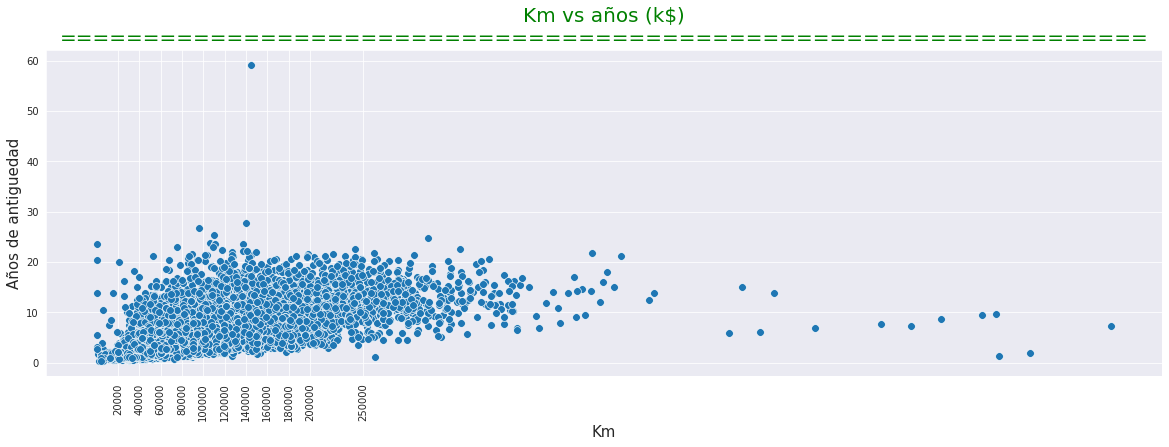

In [48]:
# Años vs Km

plt.figure(figsize=(20,6)) # tamaño del grafico
sns.set_style('darkgrid') # estilo del grafico

sns.scatterplot(data=dataset, x="Km", y= "Antigüedad_años", s=60) # tipo del gráfico
# le decimos el dataframe a tomar en cuenta y sus variables así como el color y el tamañao
plt.title("Km vs años (k$)\n=================================================================", fontsize=20, color="green")
plt.xticks([20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,250000]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.xticks(rotation=90) # y así las roto 45 grados. 
plt.xlabel("Km", fontsize=15)
plt.ylabel("Años de antiguedad", fontsize=15)
plt.show()

## le llamamos binning, que es hacer intervalos con los datos que tenemos

In [49]:
# aqui lo que estamos haciendo es hacer grupos por edad. 
# Age - 

Age_0_2 = dataset.Antigüedad_años[(dataset.Antigüedad_años>=0) & (dataset.Antigüedad_años<=2)] 
Age_3_4 = dataset.Antigüedad_años[(dataset.Antigüedad_años>=3) & (dataset.Antigüedad_años<=4)] 
Age_5_6 = dataset.Antigüedad_años[(dataset.Antigüedad_años>=5) & (dataset.Antigüedad_años<=6)] 
Age_7_8 = dataset.Antigüedad_años[(dataset.Antigüedad_años>=7) & (dataset.Antigüedad_años<=8)] 
Age_9_10 = dataset.Antigüedad_años[(dataset.Antigüedad_años>=9) & (dataset.Antigüedad_años<=10)] 
Age_11_12 = dataset.Antigüedad_años[(dataset.Antigüedad_años>=11) & (dataset.Antigüedad_años<=12)] 
 
Age_12_Above = dataset.Antigüedad_años[(dataset.Antigüedad_años>=13)]

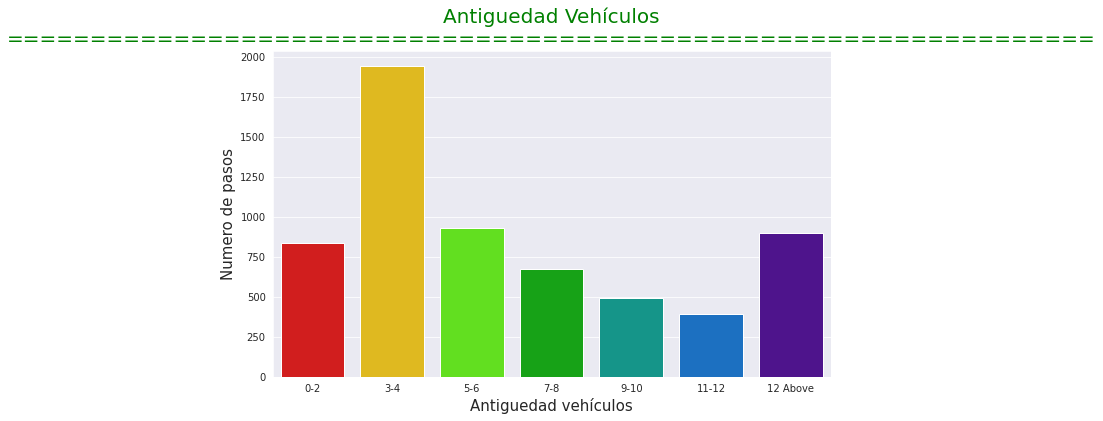

In [50]:
x = ["0-2","3-4","5-6","7-8","9-10","11-12", "12 Above"]
y = [len(Age_0_2.values),len(Age_3_4.values),len(Age_5_6.values),len(Age_7_8.values),len(Age_9_10.values), len(Age_11_12.values), len(Age_12_Above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="nipy_spectral_r")
plt.title("Antiguedad Vehículos\n=================================================================", fontsize=20, color="green")
plt.xlabel("Antiguedad vehículos", fontsize=15)
plt.ylabel("Numero de pasos", fontsize=15)
plt.show()

In [51]:
# aqui lo que estamos haciendo es hacer grupos por Km
# Age - 

Km_0_30 = dataset.Km[(dataset.Km>=0) & (dataset.Km<=30000)]         
Km_31_60= dataset.Km[(dataset.Km>=31000) & (dataset.Km<=60000)] 
Km_61_90 = dataset.Km[(dataset.Km>=61000) & (dataset.Km<=90000)] 
Km_91_120 = dataset.Km[(dataset.Km>=91000) & (dataset.Km<=120000)]
Km_121_150 = dataset.Km[(dataset.Km>=121000) & (dataset.Km<=150000)]
Km_151_180 = dataset.Km[(dataset.Km>=151000) & (dataset.Km<=180000)]
Km_181_210 = dataset.Km[(dataset.Km>=181000) & (dataset.Km<=210000)]
Km_211_240 = dataset.Km[(dataset.Km>=211000) & (dataset.Km<=240000)]
  
Km_241_Above = dataset.Km[(dataset.Km>=241000)]

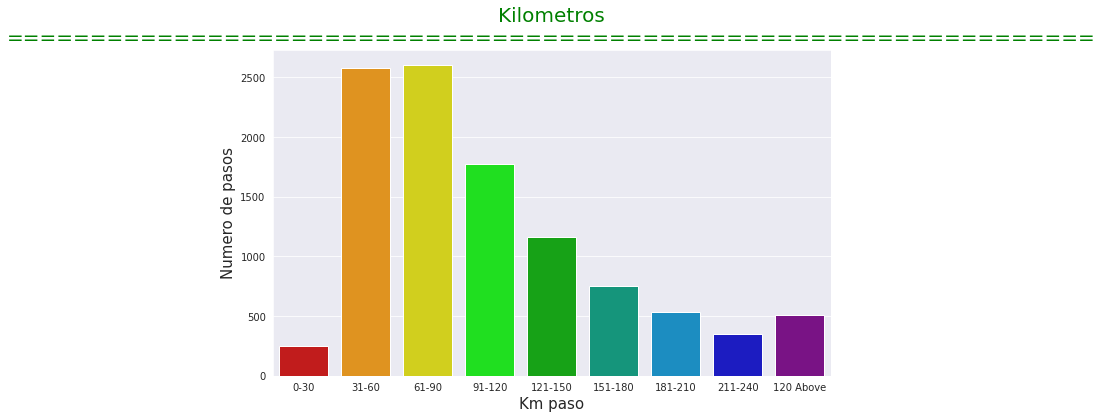

In [53]:
x = ["0-30","31-60","61-90","91-120","121-150","151-180","181-210", "211-240", "120 Above"]
y = [len(Km_0_30.values),len(Km_31_60.values),len(Km_61_90.values),len(Km_91_120.values),len(Km_121_150.values), len(Km_151_180.values),
     len(Km_181_210.values), len(Km_211_240), len(Km_241_Above)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="nipy_spectral_r")
plt.title("Kilometros\n=================================================================", fontsize=20, color="green")
plt.xlabel("Km paso", fontsize=15)
plt.ylabel("Numero de pasos", fontsize=15)
plt.show()

## Ahora vamos a reescalar. 

In [54]:
df_scaled = dataset[["Antigüedad_dias","Antigüedad_años","Km"]] # aqui estamos creando un nuevo dataframe para estandarizar
# le estamos metiendo las variables edad, ingresos anuales y gasto

# Class instance
scaler = StandardScaler()  # esta es la instancia de escalado

# Fit_transform
df_scaled_fit = scaler.fit_transform(df_scaled)  # aqui ajustamos 

In [56]:
df_scaled_fit = pd.DataFrame(df_scaled_fit) # renombramos el dataframe una vez scalado y lo convertimos en un dataframe
df_scaled_fit.columns = ["Antigüedad_dias","Antigüedad_años","Km"] # le ponemos el nombre a las columnas 
df_scaled_fit.head()

,Antigüedad_dias,Antigüedad_años,Km
0,-0.739996,-0.739381,-0.233497
1,-0.139832,-0.139086,0.449395
2,0.458307,0.458779,-0.600999
3,-0.827759,-0.826873,-1.068369
4,-0.852062,-0.851176,-0.430261


In [57]:
var_list = df_scaled_fit[["Antigüedad_años","Km"]] # nos quedamos con dos variables. 
var_list

,Antigüedad_años,Km
0,-0.739381,-0.233497
1,-0.139086,0.449395
2,0.458779,-0.600999
3,-0.826873,-1.068369
4,-0.851176,-0.430261
...,...,...
11302,-0.826873,-0.251623
11303,-0.873050,-0.624245
11304,1.124693,1.865306
11305,-0.061315,-0.582167


In [58]:
# Calculating sum of squared distance
# calculando el cuadrado de las distancias. 
ssd = [] # creamos lista vacía. 

for num_clusters in range(1,11): # generamos el bucle. 
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50) # le metemos la variables para el kmeans
    kmeans.fit(var_list) # los ajustamos al dataframe var_list que jemso creado arriba. 
    
    ssd.append(kmeans.inertia_) # kmeans-inertia el el valor de la distancia cuadratica. 

In [59]:
ssd # estas son las distancias cuadráticas de los puntos. 

[22614.00000000003,
 10066.787386840213,
 7272.992796082288,
 5836.349370784275,
 4911.193600201026,
 4166.626219437123,
 3595.4206643669336,
 3176.1973419169926,
 2810.4339514047033,
 2560.7284373999223]

## la técnica del codo

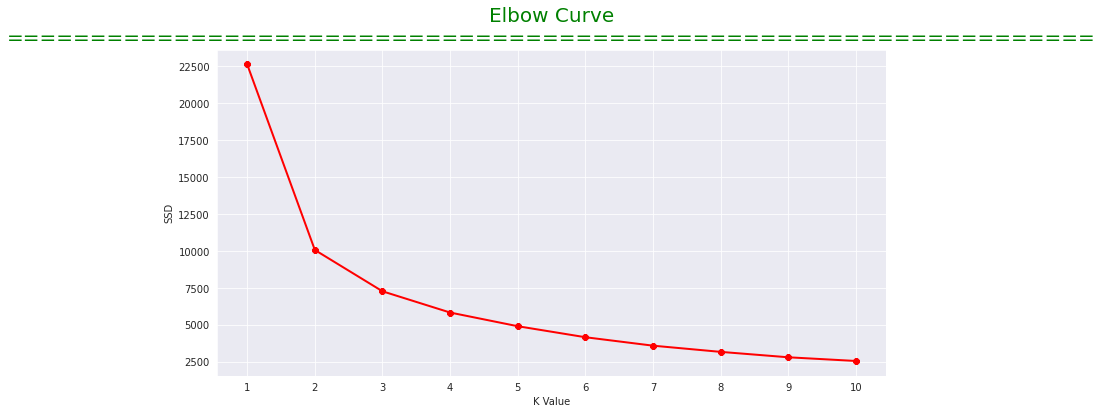

In [60]:
plt.figure(figsize=(12,6)) # tamaño del gráfico 

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
# en el grafico metemos el range, la lista ssd, ancho  de la linea, color y el tamaño del punto
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")  
plt.xticks(np.arange(1,11,1))  # estos son los valores que queremos que aparezcan en el eje x
plt.ylabel("SSD")

plt.show()

# como podemos ver debajo el codo pierde la pendiente en k igual a 4

In [74]:
# K=4

kmeans = KMeans(n_clusters=4, max_iter=50)  # aqui ya ponemos que el numero de clusters es 5
kmeans.fit(var_list) # lo ajustamos al dataframe. 

KMeans(max_iter=50, n_clusters=4)

In [75]:
kmeans.labels_  # aqui ya tenemos a que kluster pertencen

array([1, 0, 0, ..., 2, 1, 1], dtype=int32)

In [76]:
dataset["Label"] = kmeans.labels_
# aui estamos creando una variable donde metemos todos los clusters.
# estamos metiendolo en el dataframe df. 

In [77]:
dataset.head()

,Tall,Matricula,F_matriculacion,Pastillas_FechaCierre,Antigüedad_dias,Antigüedad_años,Km,Label
0,2,7255KVN,15-2-19,29-4-22,1169.0,3.25,91369.0,1
1,6,6558JSN,9-9-16,29-4-22,2058.0,5.72,137785.0,0
2,1,5048HWT,7-4-14,29-4-22,2944.0,8.18,66390.0,0
3,1,9290KXS,25-6-19,29-4-22,1039.0,2.89,34623.0,1
4,1,9114KZH,31-7-19,29-4-22,1003.0,2.79,77995.0,1


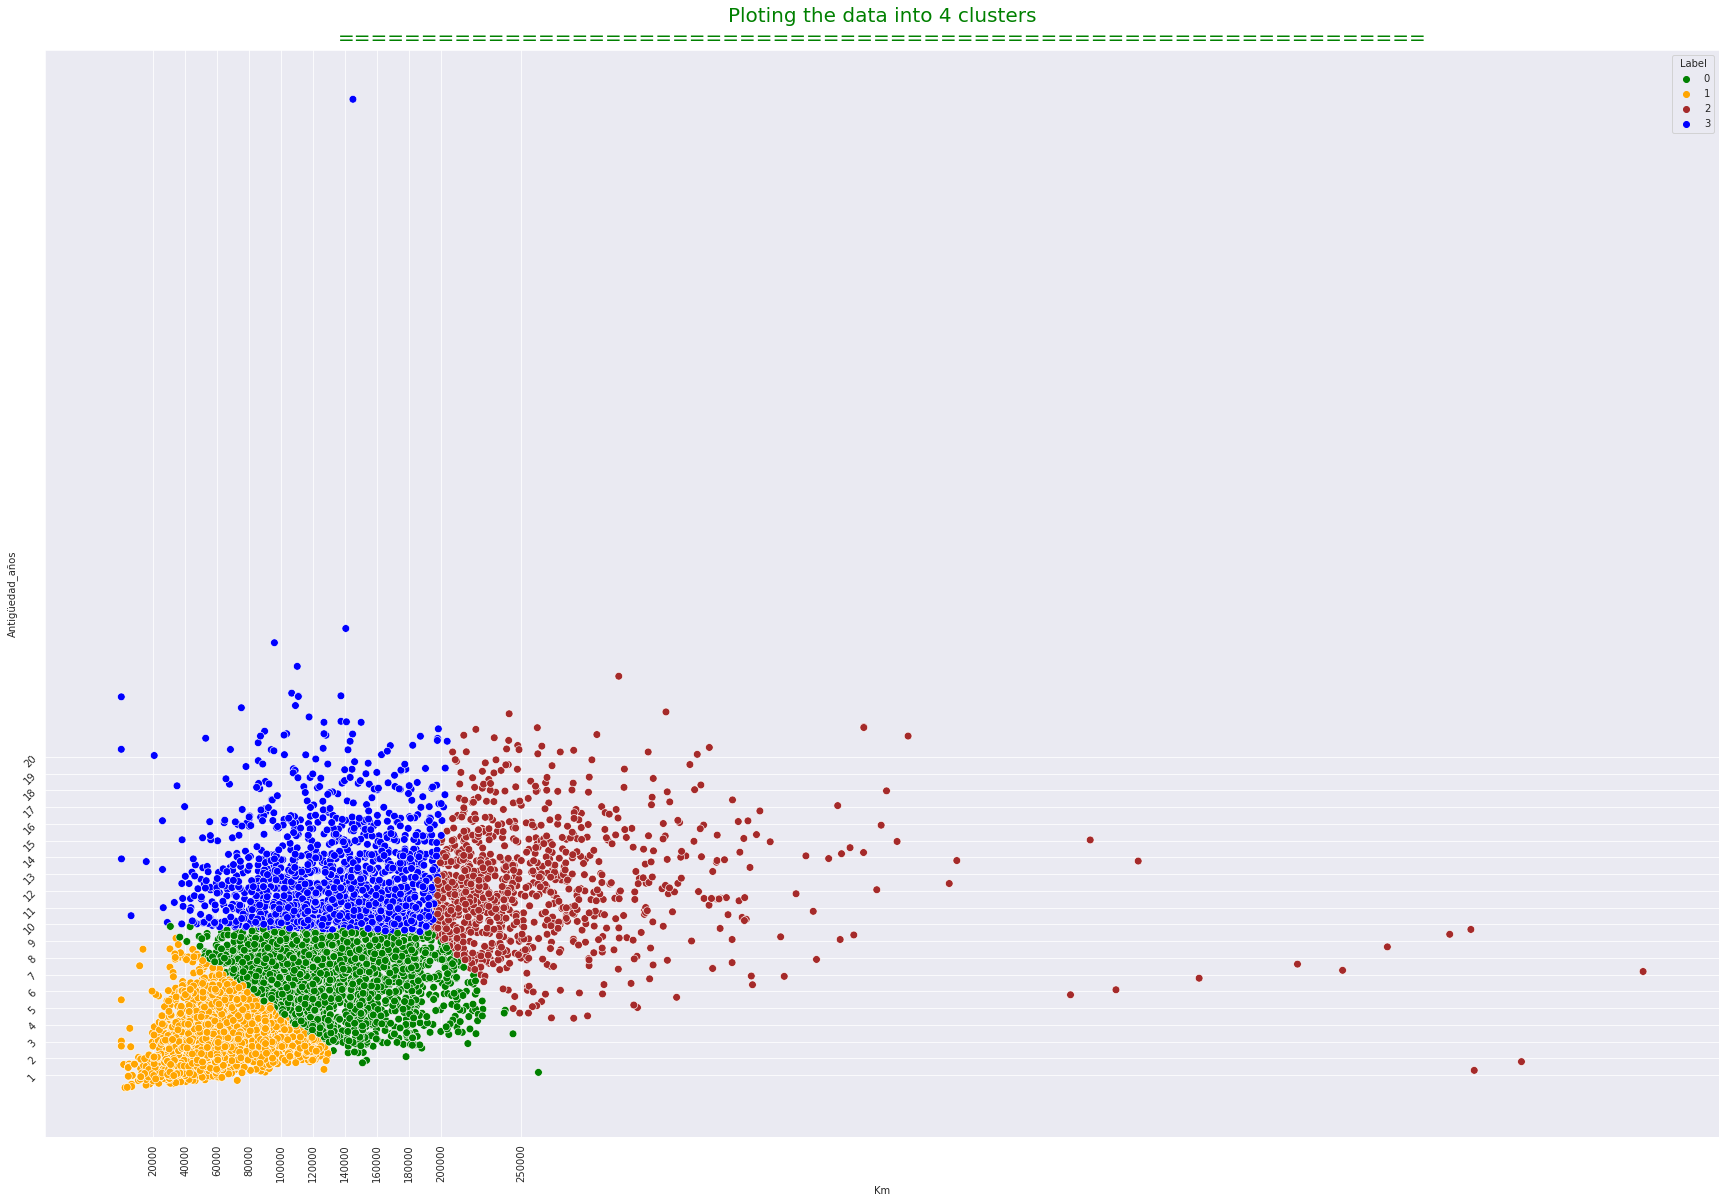

In [79]:
# ScatterPlot when K=4

# ahora vamos a graficar el cluster segun ingresos y gastos. 

plt.figure(figsize=(30,20))

plt.title("Ploting the data into 4 clusters\n=================================================================", fontsize=20, color="green")
plt.xticks([20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,250000]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.yticks(rotation=45) # y así las roto 45 grados. 
plt.xticks(rotation=90) # y así las roto 45 grados. 
sns.scatterplot(data=dataset, x="Km", y="Antigüedad_años", hue="Label", s=60, palette=['green','orange','brown','blue'])
# metemos el dataframe df, la x va a ser annual income y la y spending score, el color será el cluster . y le ponemos color a cada cluster. 

plt.show()